# <h1 align="center"> © RsydMathTech. <h1/>

# Model Evaluation

## 1. Train/Test Split
- Dataset dibagi menjadi **Train** dan **Test**.
- Train digunakan untuk melatih model, Test untuk mengevaluasi generalisasi.
- Umumnya: 70% Train – 30% Test.

$$
\text{Generalization Error} = \text{Performance on Test Data}
$$

---

## 2. Overfitting vs Underfitting
- **Overfitting**: model terlalu rumit, hafal data training, gagal di data baru.  
  - $R^2_{train} \gg R^2_{test}$
- **Underfitting**: model terlalu sederhana, gagal menangkap pola data.  
  - $R^2_{train}$ rendah, $R^2_{test}$ juga rendah.
- **Good Fit**: $R^2$ cukup tinggi pada train dan test, relatif seimbang.

---

## 3. Cross-Validation
- Data dibagi menjadi $k$ lipatan (fold).  
- Model dilatih $k$ kali, setiap kali 1 fold dipakai sebagai test dan sisanya train.  
- Hasil rata-rata memberikan estimasi performa yang lebih stabil.

$$
\text{CV Score} = \frac{1}{k}\sum_{i=1}^k R^2_i
$$

---

## 4. Evaluation Metrics
- **MSE (Mean Squared Error)**  
  $$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$
- **RMSE (Root Mean Squared Error)**  
  $$ RMSE = \sqrt{MSE} $$
- **$R^2$ (Coefficient of Determination)**  
  $$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $$

Interpretasi:
- $MSE, RMSE$ → makin kecil makin baik.
- $R^2$ → makin mendekati $1$, makin baik model.

---

## 5. Model Selection
- Gunakan **Train/Test Split** atau **Cross-Validation** untuk memilih model terbaik.  
- Hindari hanya mengejar performa di training set.  
- Pilih model dengan **bias-variance tradeoff** yang seimbang.

---

## Summary
1. **Split data** → ukur performa di data yang belum pernah dilihat.  
2. **Overfitting/Underfitting** → pahami cirinya lewat perbandingan $R^2_{train}$ vs $R^2_{test}$.  
3. **Cross-validation** → evaluasi lebih stabil.  
4. **Metrics (MSE, RMSE, $R^2$)** → ukur kualitas prediksi.  


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3*X.squeeze() + np.random.normal(0, 2, 100)

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# 4. Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# 5. Evaluation Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R^2 (Train):", r2_train)
print("R^2 (Test):", r2_test)

# 6. Cross-Validation
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", cv_scores)
print("Average CV R^2:", np.mean(cv_scores))

MSE (Train): 3.709090551346698
MSE (Test): 2.219452553946354
R^2 (Train): 0.9547272425007565
R^2 (Test): 0.9718011523608319
Cross-Validation R^2 Scores: [-0.40974257  0.28547615  0.617892    0.33960412  0.538556  ]
Average CV R^2: 0.2743571424228687


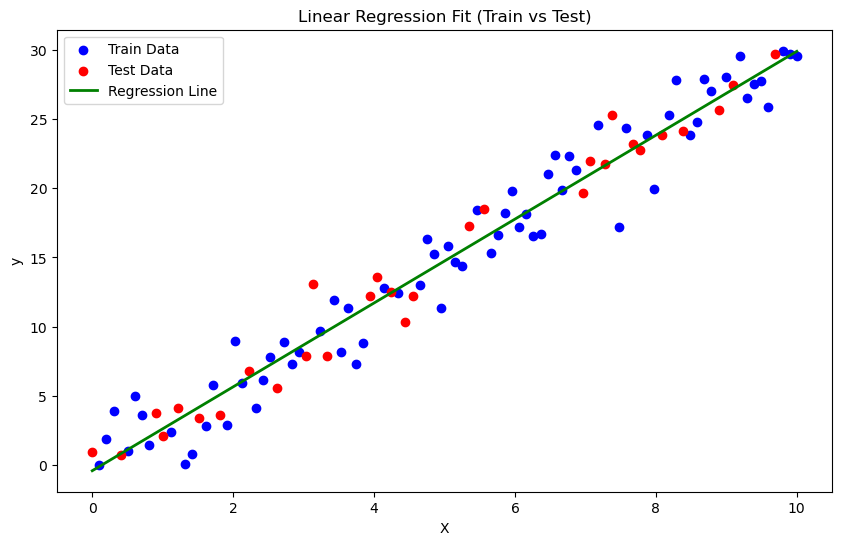

In [2]:
import matplotlib.pyplot as plt

# Plot Train vs Test with prediction line
plt.figure(figsize=(10,6))

# Scatter data
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Plot regression line (predicted line for all X)
plt.plot(X, lr.predict(X), color='green', linewidth=2, label='Regression Line')

plt.title("Linear Regression Fit (Train vs Test)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()